<a href="https://www.kaggle.com/code/ghaithmechi/image-processing-with-opencv-and-python?scriptVersionId=166402582" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


In this notebook, we'll utilize OpenCV to perform image preprocessing tasks before diving into more advanced operations.

In [1]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

plt.style.use('ggplot')

In [2]:
cats = glob('/kaggle/input/cat-and-dog-finder/training_set/training_set/cats/*.jpg')
dogs = glob('/kaggle/input/cat-and-dog-finder/training_set/training_set/dogs/*.jpg')

In [3]:
img_mpl= plt.imread(cats[5])
img_cv2=cv2.imread(cats[5])

In [4]:
#shape
img_mpl.shape, img_cv2.shape

((426, 500, 3), (426, 500, 3))

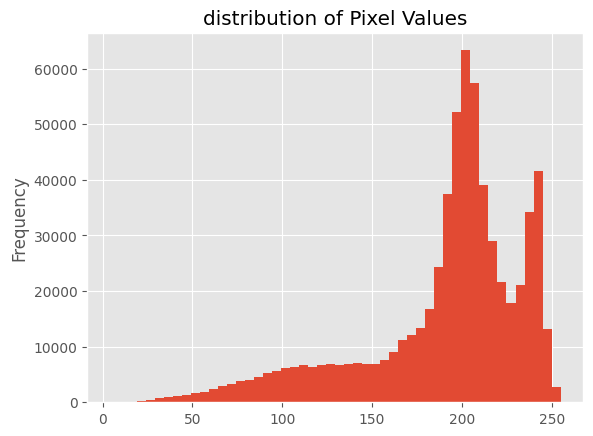

In [5]:
#distribution of Pixel Values
pd.Series(img_mpl.flatten()).plot(kind='hist',bins=50, title='distribution of Pixel Values')
plt.show()

# Display Images

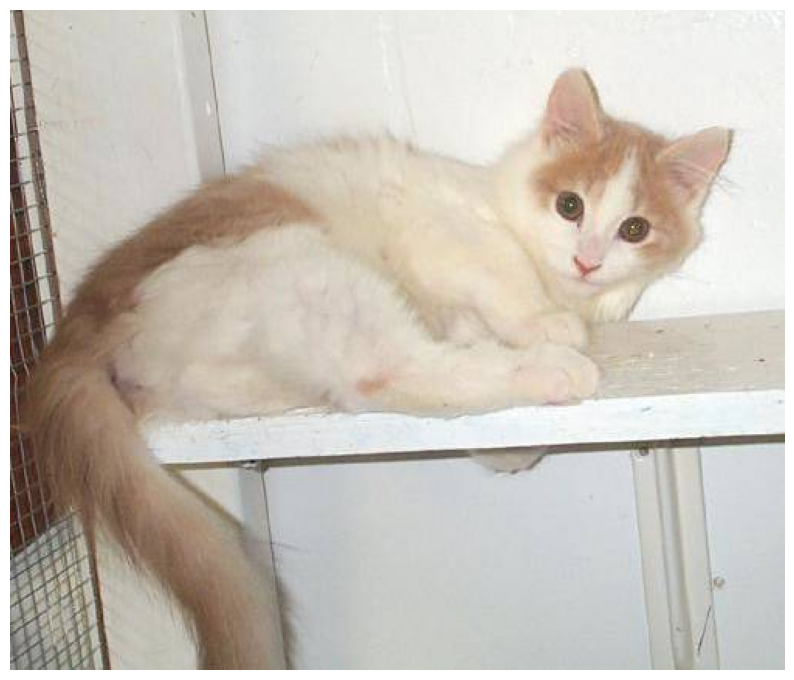

In [6]:
fig, ax= plt.subplots(figsize=(10,10))
ax.imshow(img_mpl)
plt.axis('off')
plt.show()

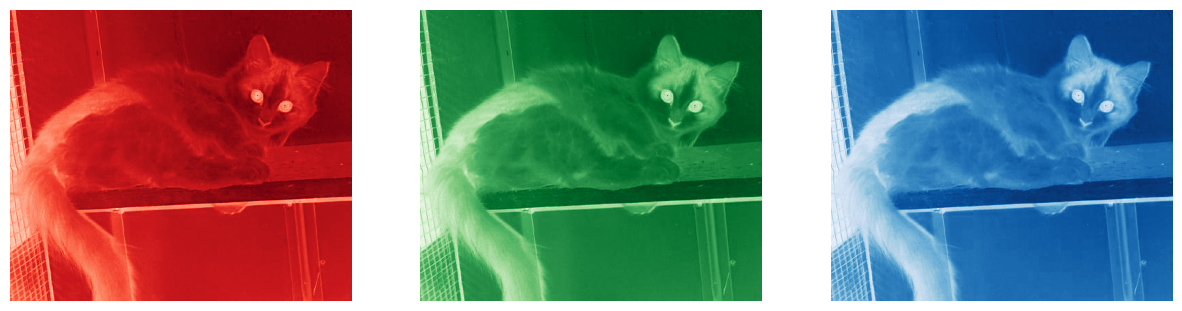

In [7]:
# Display RGB Channels of our Image
fig,axs=plt.subplots(1,3, figsize=(15,5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

# Matplotlib vs cv2
## cv2 reads in channels as BGR
## matplotlib reads in channels RGB

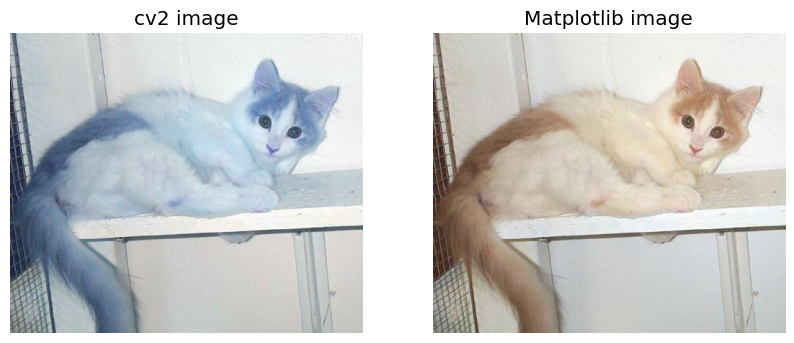

In [8]:
fig, axs = plt.subplots (1,2, figsize=(10,5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('cv2 image')
axs[1].set_title('Matplotlib image')
plt.show()

# Converting from BGR to RGB

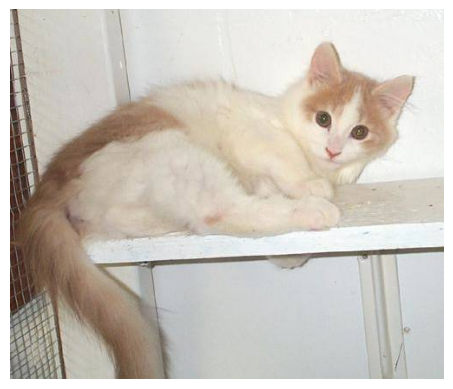

In [9]:
img_cv2_rgb=cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig,ax= plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

# Image Manipulation

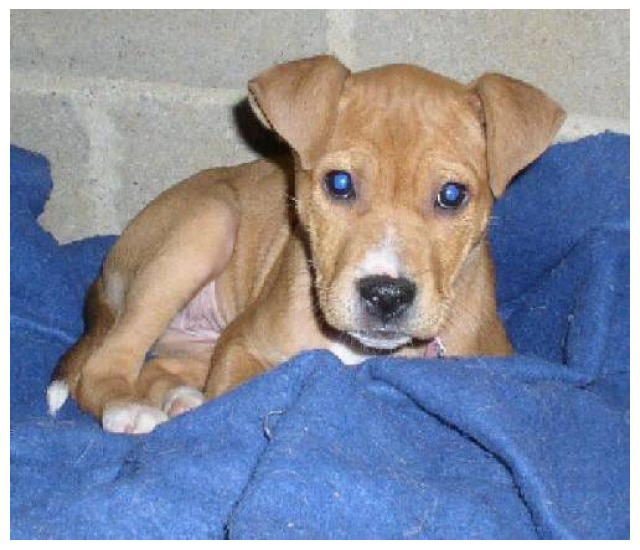

In [10]:
img= plt.imread(dogs[11])
fig, ax=plt.subplots(figsize=(8,8))
ax.imshow(img)
ax.axis('off')
plt.show()

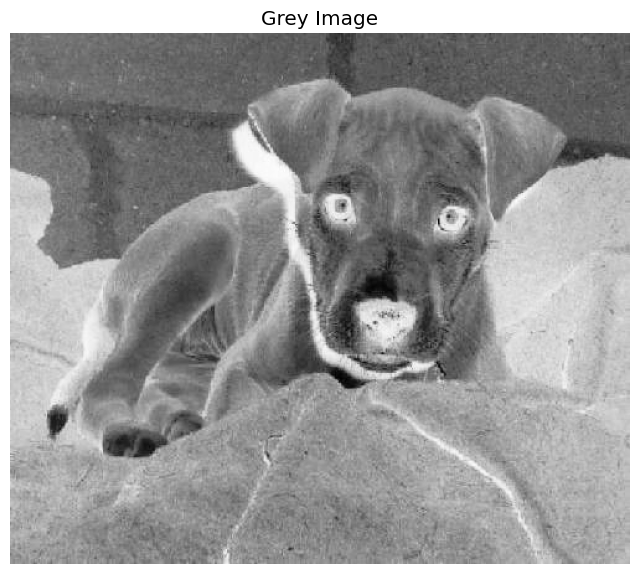

In [11]:
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
fig,ax= plt.subplots(figsize=(8,8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

# Resizing and Scaling

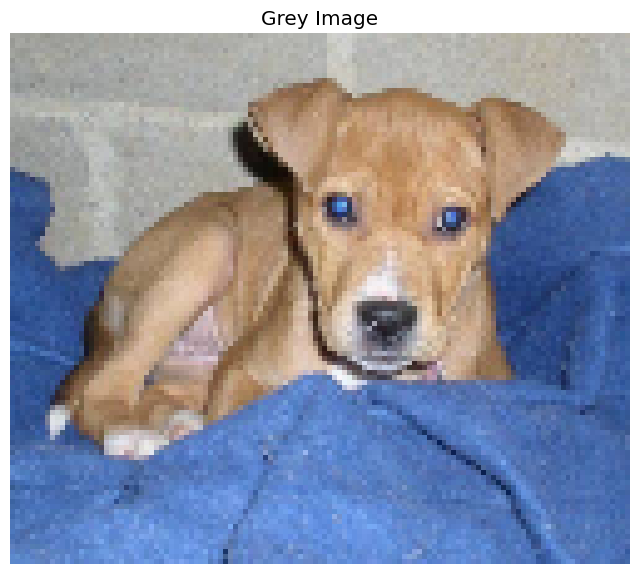

In [12]:
img_resized=cv2.resize(img,None, fx=0.25, fy=0.25)
fig,ax= plt.subplots(figsize=(8,8))
ax.imshow(img_resized, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

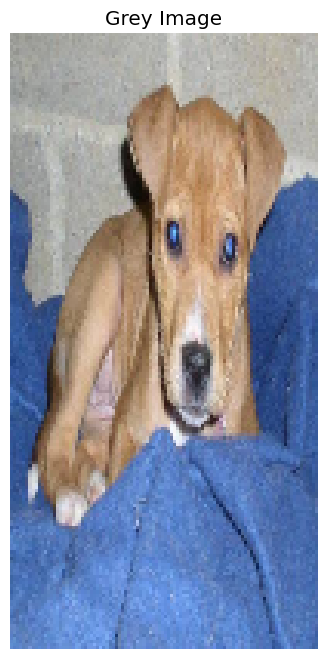

In [13]:
img_resized2= cv2.resize(img, (100,200))
fig,ax= plt.subplots(figsize=(8,8))
ax.imshow(img_resized2, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

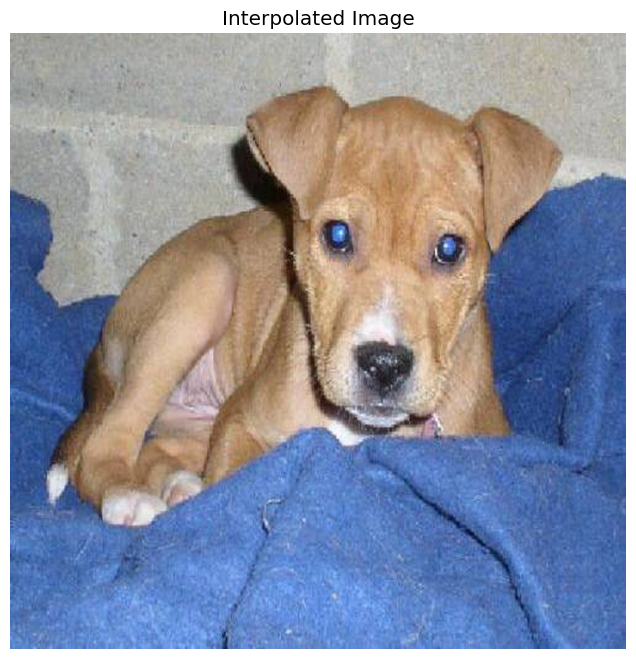

In [14]:
img_resized3= cv2.resize(img, (5000,5000), interpolation= cv2.INTER_CUBIC)
fig,ax= plt.subplots(figsize=(8,8))
ax.imshow(img_resized3, cmap='Greys')
ax.axis('off')
ax.set_title('Interpolated Image')
plt.show()

# Filters

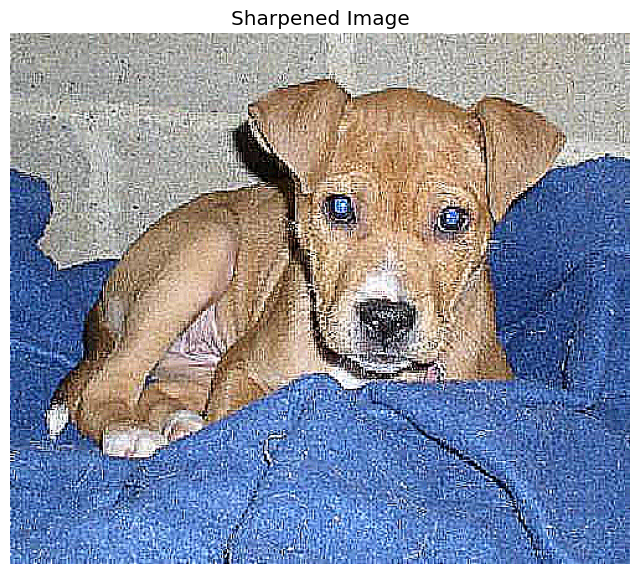

In [15]:
kernel_sharpening=np.array([[-1,-1,-1],
                           [-1,9,-1],
                           [-1,-1,-1]])
sharpened_img=cv2.filter2D(img,-1,kernel_sharpening)
fig,ax= plt.subplots(figsize=(8,8))
ax.imshow(sharpened_img, cmap='Greys')
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

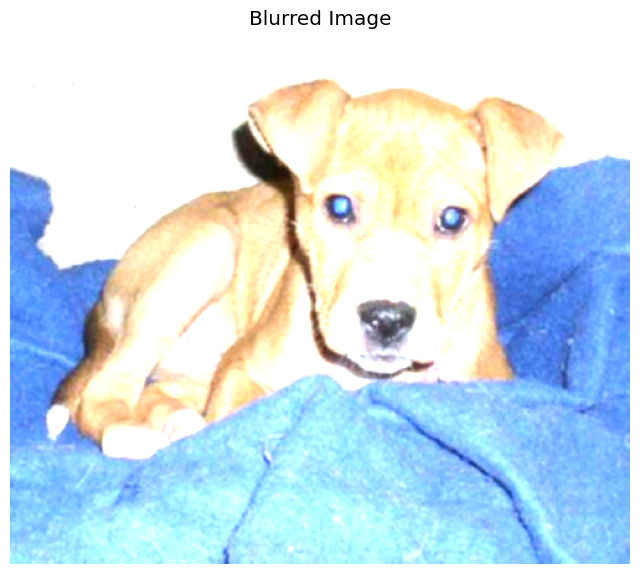

In [16]:
# Blurring the image
kernel_3x3=np.ones((3,3),np.float32)/5
blurred= cv2.filter2D(img,-1, kernel_3x3)
fig,ax= plt.subplots(figsize=(8,8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

# Save Image

In [17]:
plt.imsave('mpl_dog_img.png', blurred)
cv2.imwrite('cv2_dog_img.png', blurred)

True